## wine quality prediction based on chemical properties

- predict the quality of a wine based on the chemical properties of the wine.
- dataset: wine quality dataset hosted on the <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">UCI website</a>. 


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score

###  Data preparation

Import data

In [3]:
df = pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


total 1599. no NaN object.

- features: all columns except quality.
- target: quality
- classified quality into bad $(score<7)$ or good $(score>7)$ into 0 or 1.

In [6]:
Y = df.quality.values
dfx = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])

In [7]:
# save feautre into numpy array
X = dfx.as_matrix()


### build random forest
- varying number of trees
- use 10-fold cross-validation.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# modeling
scores =[]
treen= []
for i in range(1,21):
    forest_clf = RandomForestClassifier(n_estimators=i)
    score_list = cross_val_score(forest_clf,X,Y,cv=10)
    scores.append(score_list)
    treen.append(i)

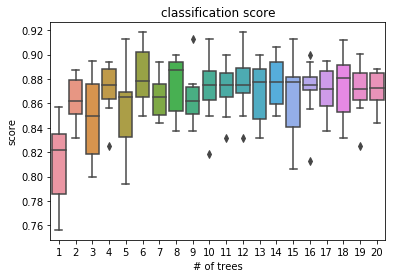

In [10]:
# plot results
sns.boxplot(x=treen,y=scores)
plt.xlabel('# of trees')
plt.ylabel('score')
plt.title('classification score')
plt.show()

after ~ 10 trees. score not much different.

In [11]:
blind_guess_score = sum(1-Y)/float(len(Y))
print (100*float(sum(1-Y))/len(Y))

86.42901813633522


if you blind guess, you are right 86% of the time.

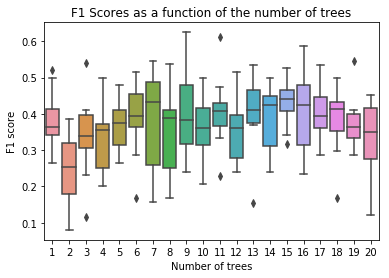

In [12]:
# your code here
scores = []
treen = []
for i in range(1,21):
    clf = RandomForestClassifier(n_estimators = i)
    score_list = cross_val_score(clf, X, Y, cv=10, scoring='f1')
    scores.append(score_list)
    treen.append(i)

sns.boxplot(x=treen,y=scores)
plt.xlabel('Number of trees')
plt.ylabel('F1 score')
plt.title('F1 Scores as a function of the number of trees')
plt.show()

### calibration

In [13]:
clf = RandomForestClassifier(n_estimators=15)
clf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1] > cutoff).astype(int)

In [15]:
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return sklearn.metrics.f1_score(y, ypred)
        
    return f1_cutoff

In [16]:
scores = []
cutoffi = []
for cutoff in np.arange(0.1,0.9,0.1):
    clf = RandomForestClassifier(n_estimators=15)
    score_list = cross_val_score(clf,X,Y,cv=10,scoring=custom_f1(cutoff))
    scores.append(score_list)
    cutoffi.append(cutoff)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

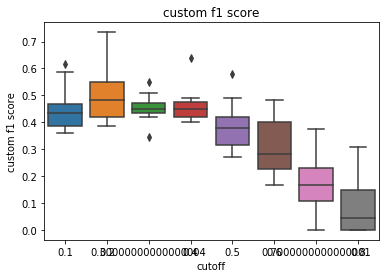

In [17]:
sns.boxplot(x=cutoffi,y=scores)
plt.xlabel('cutoff')
plt.ylabel('custom f1 score')
plt.title('custom f1 score')
plt.show()

- cutoff about 0.2 to 0.3 give the best custom f1 score.
- because most of the wine are 'bad'. therefore adjusting the cut-off to 0.2 can balance the recall and precision and improve f1.


### visualize decision surface

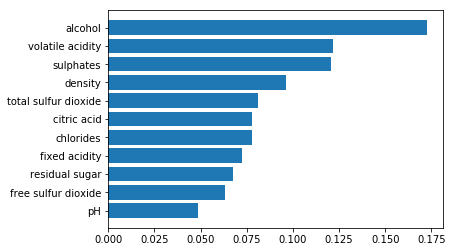

In [18]:
# identifying the most important factors.
clf.fit(X,Y)
list_importance = clf.feature_importances_
list_name = df.columns
list_importance, list_name = zip(*sorted(zip(list_importance, list_name)))
plt.barh(range(len(list_importance)),list_importance)
plt.yticks(range(len(list_name)),list_name)
plt.show()

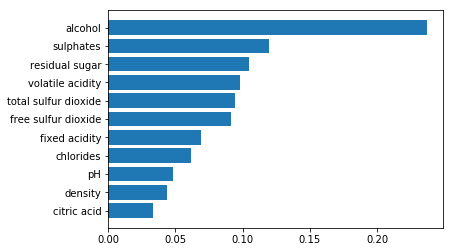

In [19]:
# identifying the most important factors.
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(X,Y)
list_importance = clf.feature_importances_
list_name = df.columns
list_importance, list_name = zip(*sorted(zip(list_importance, list_name)))
plt.barh(range(len(list_importance)),list_importance)
plt.yticks(range(len(list_name)),list_name)
plt.show()

In [20]:
def plot_decision_surface(clf, X_train, Y_train):
    Xmin0 = X_train[:, 0].min()
    Xmin1 = X_train[:, 1].min()
    Xmax0 = X_train[:, 0].max()
    Xmax1 = X_train[:, 1].max() 
    
    plot_step_0=(Xmax0-Xmin0)/50
    plot_step_1=(Xmax1-Xmin1)/50


    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = Xmin0, Xmax0
    y_min, y_max = Xmin1, Xmax1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step_0),
                         np.arange(y_min, y_max, plot_step_1))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y,cmap=plt.cm.Paired,alpha=0.1)
    plt.show()

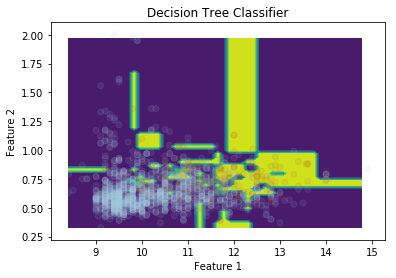

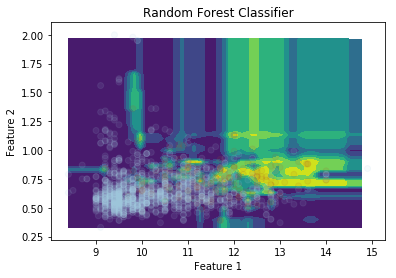

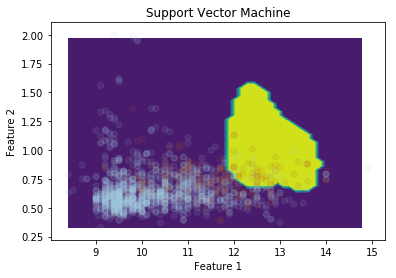

In [24]:
# 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
imp_cols = clf.feature_importances_.argsort()[::-1][0:2]
X_imp = X[:,imp_cols]

classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(n_estimators=15),
               SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'Support Vector Machine']
for c in range(3):
    plt.title(titleClassifer[c])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plot_decision_surface(classifiers[c], X_imp, Y)

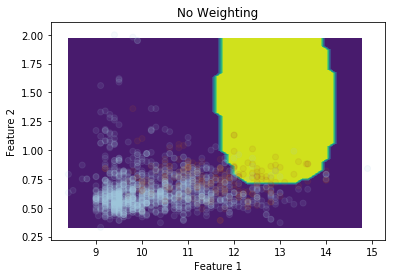

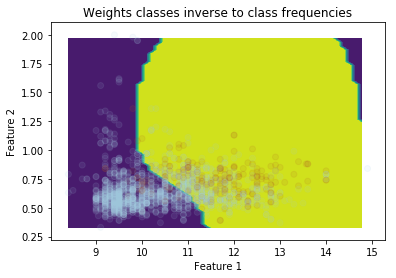

In [23]:
## 

classifiers = [sklearn.svm.SVC(C=1.0, gamma=1.0, class_weight=None),
               sklearn.svm.SVC(C=1.0, gamma=1.0, class_weight='balanced')]
 
titleClassifer = ['No Weighting', 'Weights classes inverse to class frequencies']

for c in range(2):
    plt.title(titleClassifer[c])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plot_decision_surface(classifiers[c], X_imp, Y)